In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('./airbnb-recruiting-new-user-bookings/train_users_2.csv')

In [3]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [4]:
train.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [5]:
train['gender'].value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

In [6]:
train = train.loc[train['age'] <= 80].copy()

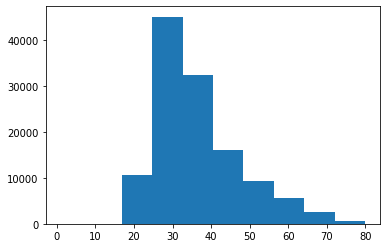

In [7]:
plt.hist(train['age']);

In [8]:
train['age'].describe()

count    122690.000000
mean         36.358742
std          11.290704
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max          80.000000
Name: age, dtype: float64

In [9]:
train['age'].replace(np.nan, train['age'].median(), inplace=True)

In [10]:
train['age'].describe()

count    122690.000000
mean         36.358742
std          11.290704
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max          80.000000
Name: age, dtype: float64

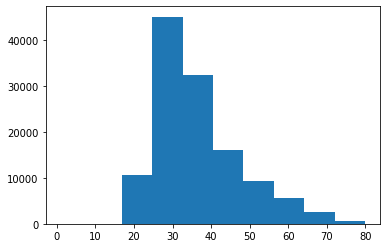

In [11]:
plt.hist(train['age']);

In [12]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US


In [13]:
train['date_first_booking'] = pd.to_datetime(train['date_first_booking'])

In [14]:
train['date_first_booking'].dtypes

dtype('<M8[ns]')

In [15]:
train['date_first_booking']

1               NaT
2        2010-08-02
3        2012-09-08
4        2010-02-18
6        2010-01-05
            ...    
213441   2014-08-13
213443   2014-07-13
213445   2014-07-02
213446          NaT
213448          NaT
Name: date_first_booking, Length: 122690, dtype: datetime64[ns]

In [16]:
train['first_booking_month'] = pd.DatetimeIndex(train['date_first_booking']).month

In [17]:
train['first_booking_month']

1         NaN
2         8.0
3         9.0
4         2.0
6         1.0
         ... 
213441    8.0
213443    7.0
213445    7.0
213446    NaN
213448    NaN
Name: first_booking_month, Length: 122690, dtype: float64

In [18]:
train['first_booking_month'].replace(np.nan, 0, inplace=True)

In [19]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,first_booking_month
1,820tgsjxq7,2011-05-25,20090523174809,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,0.0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,8.0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,9.0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2.0
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,1.0


In [20]:
train['first_affiliate_tracked'].isna().sum()

1971

In [21]:
train['fat_boolean'] = train['first_affiliate_tracked'].isna()

In [22]:
train = train[train['fat_boolean'] == False]

In [23]:
train['first_affiliate_tracked'].isna().sum()

0

In [24]:
train.isna().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         53994
gender                         0
age                            0
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked        0
signup_app                     0
first_device_type              0
first_browser                  0
country_destination            0
first_booking_month            0
fat_boolean                    0
dtype: int64

In [25]:
train.drop(columns=['date_first_booking',
                    'fat_boolean',
                    'date_account_created',
                    'timestamp_first_active'], inplace=True)

In [26]:
train.head()

,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,first_booking_month
1,820tgsjxq7,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,0.0
2,4ft3gnwmtx,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,8.0
3,bjjt8pjhuk,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,9.0
4,87mebub9p4,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2.0
6,lsw9q7uk0j,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,1.0


In [27]:
train = pd.get_dummies(train, columns=['gender',
                                       'signup_method',
                                       'signup_flow',
                                       'language',
                                       'affiliate_channel',
                                       'affiliate_provider',
                                       'first_affiliate_tracked',
                                       'signup_app', 
                                       'first_device_type', 
                                       'first_browser',
                                       'first_booking_month'], drop_first=True)

In [28]:
train.head()

,id,age,country_destination,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_facebook,signup_method_google,signup_flow_1,signup_flow_2,...,first_booking_month_3.0,first_booking_month_4.0,first_booking_month_5.0,first_booking_month_6.0,first_booking_month_7.0,first_booking_month_8.0,first_booking_month_9.0,first_booking_month_10.0,first_booking_month_11.0,first_booking_month_12.0
1,820tgsjxq7,38.0,NDF,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4ft3gnwmtx,56.0,US,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,bjjt8pjhuk,42.0,other,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,87mebub9p4,41.0,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,lsw9q7uk0j,46.0,US,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
train['country_destination'] = train['country_destination'].map({'US':0,
                                                                 'FR':1,
                                                                 'CA':2,
                                                                 'GB':3,
                                                                 'ES':4,
                                                                 'IT':5,
                                                                 'PT':6,
                                                                 'NL':7,
                                                                 'DE':8,
                                                                 'AU':9,
                                                                 'NDF':10,
                                                                 'other':11})

In [32]:
train.head()

,id,age,country_destination,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_facebook,signup_method_google,signup_flow_1,signup_flow_2,...,first_booking_month_3.0,first_booking_month_4.0,first_booking_month_5.0,first_booking_month_6.0,first_booking_month_7.0,first_booking_month_8.0,first_booking_month_9.0,first_booking_month_10.0,first_booking_month_11.0,first_booking_month_12.0
1,820tgsjxq7,38.0,10,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4ft3gnwmtx,56.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,bjjt8pjhuk,42.0,11,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,87mebub9p4,41.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,lsw9q7uk0j,46.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
train.to_csv('./data/train_clean.csv', index=False)